# 3D Printer DataSet for Mechanical Engineers

Import Data

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive/3D_printer.csv'

'/content/drive/My Drive/3D_printer.csv'


In [ ]:
file_path = '/content/drive/My Drive/3D_printer.csv'
data = pd.read_csv(file_path)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        66 non-null     float64
 1   wall_thickness      66 non-null     float64
 2   infill_density      66 non-null     int64  
 3   infill_pattern      66 non-null     object 
 4   nozzle_temperature  66 non-null     int64  
 5   Bed_temperature     66 non-null     int64  
 6   Print_speed         66 non-null     int64  
 7   Material            66 non-null     object 
 8   Fan_speed           66 non-null     int64  
 9   Roughness           66 non-null     int64  
 10  Tension_strenght    66 non-null     int64  
 11  Elongation          66 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 6.3+ KB


Let's multiply these columns by 100 to make them more understandable.

In [ ]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,Bed_temperature,Print_speed,Material,Fan_speed,Roughness,Tension_strenght,Elongation
0,0.02,8.0,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7.0,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1.0,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4.0,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6.0,90,grid,250,80,40,abs,100,92,5,0.7


In this data set, ABS and PLA assigned 0 and 1 values for materials.

In [ ]:
data.Material = [0 if each == "abs" else 1 for each in data.Material]
# abs = 0, pla = 1

data.infill_pattern = [0 if each == "grid" else 1 for each in data.infill_pattern]
# grid = 0, honeycomb = 1

In [ ]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,Bed_temperature,Print_speed,Material,Fan_speed,Roughness,Tension_strenght,Elongation
0,0.02,8.0,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7.0,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1.0,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4.0,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6.0,90,0,250,80,40,0,100,92,5,0.7


Seperate Input parameters and Prediction Materials.

In [ ]:
y_data = data.Material.values
x_data = data.drop(["Material"],axis=1)

In [ ]:
abs = data[data.Material == 0]
pla = data[data.Material == 1]

In [ ]:
abs.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,Bed_temperature,Print_speed,Material,Fan_speed,Roughness,Tension_strenght,Elongation
0,0.02,8.0,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7.0,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1.0,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4.0,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6.0,90,0,250,80,40,0,100,92,5,0.7


In [ ]:
import matplotlib.pyplot as plt

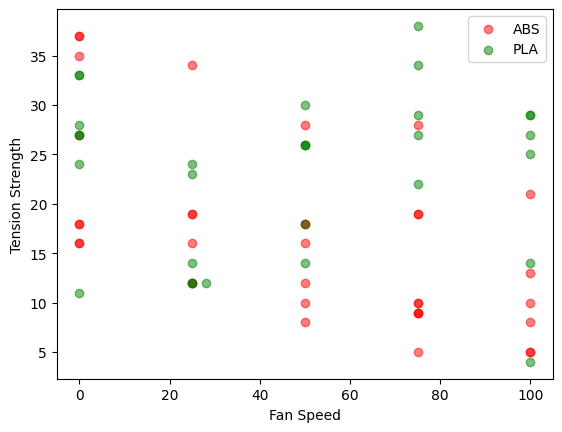

In [ ]:
#plt.scatter(absm.Fan_speed,absm.Tension_strenght,color="red",label="ABS",alpha= 0.5)
#plt.scatter(pla.Fan_speed,pla.Tension_strenght,color="green",label="PLA",alpha= 0.5)
#plt.xlabel("Fan Speed")
#plt.ylabel("Tension Strength")
#plt.legend()
#plt.show()

As you see, the air circulation not good for ABS

You can see as the layer height increases, the tensile strength increases. But PLA smoother than ABS

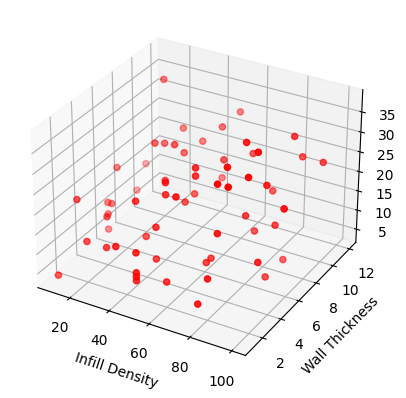

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# x = data.infill_density
# y = data.wall_thickness
# z = data.Tension_strenght

# ax.scatter(x, y, z, c='r', marker='o')

# ax.set_xlabel('Infill Density')
# ax.set_ylabel('Wall Thickness')
# ax.set_zlabel('Tension Strenght')

# plt.show()

 3 nn score: 0.65 
 1 nn score: 0.8 
 2 nn score: 0.6 
 3 nn score: 0.65 
 4 nn score: 0.7 
 5 nn score: 0.75 
 6 nn score: 0.65 
 7 nn score: 0.6 
 8 nn score: 0.7 
 9 nn score: 0.7 
 10 nn score: 0.55 
 11 nn score: 0.55 
 12 nn score: 0.55 
 13 nn score: 0.6 
 14 nn score: 0.6 


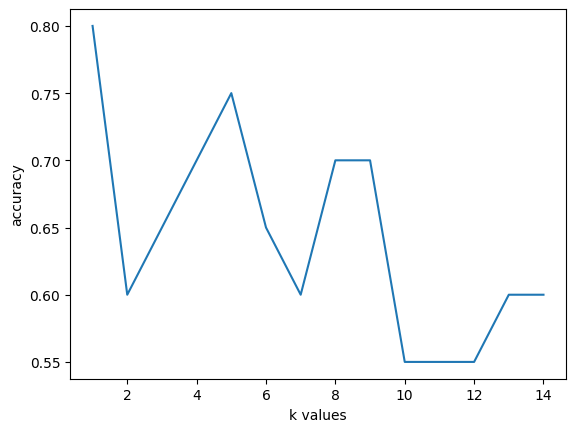

In [ ]:
# import numpy as np
# x_norm = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

# # train test split
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_norm,y_data,test_size = 0.3,random_state=1)

# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
# knn.fit(x_train,y_train)
# prediction = knn.predict(x_test)
# print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

# score_list = []
# for each in range(1,15):
#     knn2 = KNeighborsClassifier(n_neighbors = each)
#     knn2.fit(x_train,y_train)
#     score_list.append(knn2.score(x_test,y_test))
#     print(" {} nn score: {} ".format(each,knn2.score(x_test,y_test)))

# plt.plot(range(1,15),score_list)
# plt.xlabel("k values")
# plt.ylabel("accuracy")
# plt.show()

In [ ]:
!pip install keras

In [ ]:
import keras


In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Input, Dense, Flatten, BatchNormalization
from keras.optimizers import SGD


model = Sequential()
model.add(Dense(32,input_dim=11))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(16))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_data,y, epochs=500, batch_size =32, validation_split= 0.20)

Epoch 1/500
2/2 [==============================] - 2s 388ms/step - loss: 3.1209 - accuracy: 0.0577 - val_loss: 8.7306 - val_accuracy: 0.0714
Epoch 2/500
2/2 [==============================] - 0s 45ms/step - loss: 3.0811 - accuracy: 0.0577 - val_loss: 6.0421 - val_accuracy: 0.0714
Epoch 3/500
2/2 [==============================] - 0s 63ms/step - loss: 2.8652 - accuracy: 0.1154 - val_loss: 4.9428 - val_accuracy: 0.0714
Epoch 4/500
2/2 [==============================] - 0s 69ms/step - loss: 2.8568 - accuracy: 0.0577 - val_loss: 4.3060 - val_accuracy: 0.0714
Epoch 5/500
2/2 [==============================] - 0s 59ms/step - loss: 2.7502 - accuracy: 0.0769 - val_loss: 3.9204 - val_accuracy: 0.0714
Epoch 6/500
2/2 [==============================] - 0s 43ms/step - loss: 2.8265 - accuracy: 0.0769 - val_loss: 3.6597 - val_accuracy: 0.0714
Epoch 7/500
2/2 [==============================] - 0s 46ms/step - loss: 2.7246 - accuracy: 0.1346 - val_loss: 3.4550 - val_accuracy: 0.0714
Epoch 8/500
2/2 [==

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X = data.drop(["Material"], axis=1)
y = data["Material"]

X_norm = (X - X.min()) / (X.max() - X.min())

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=1)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

a1 = 4  # layer_height*100
a2 = 5  # wall_thickness
a3 = 60  # infill_density
a4 = 0  # infill_pattern
a5 = 232  # nozzle_temperature
a6 = 74  # bed_temperature
a7 = 90  # print_speed
a8 = 100  # fan_speed
a9 = 150  # roughness
a10 = 30  # tension_strength
a11 = 200  # elongation*100


input_params = np.array([a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11]).reshape(1, -1)

knn_prediction = knn.predict(input_params)
print("KNN Prediction:", knn_prediction)

svm_prediction = svm.predict(input_params)
print("SVM Prediction:", svm_prediction)

# Apply constraints
print("\nApplying Constraints:")
if a7 > 60 and a5 >= 250:
    print("Over Extrusion")
elif a7 <= 55 and a5 <= 180:
    print("Under Extrusion and Nozzle Clog")
elif knn_prediction == 0 and a6 <= 20:
    print("Warping (ABS Material)")
elif knn_prediction == 1 and a6 <= 90:
    print("Warping (PLA Material)")
else:
    print("No specific condition met")


KNN Prediction: [0]
SVM Prediction: [0]

Applying Constraints:
No specific condition met


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
